In [1]:
import os

def count_data(data_dir):
    """Đếm số lượng dữ liệu trong một thư mục và các thư mục con.

    Args:
        data_dir: Đường dẫn đến thư mục dữ liệu.

    Returns:
        Một dictionary chứa số lượng dữ liệu trong mỗi thư mục con, hoặc None nếu thư mục không tồn tại.
    """
    counts = {}
    try:
        for class_name in os.listdir(data_dir):
            class_path = os.path.join(data_dir, class_name)
            if os.path.isdir(class_path):  # Kiểm tra xem có phải thư mục con hay không
                num_files = len(os.listdir(class_path))
                counts[class_name] = num_files
    except FileNotFoundError:
        print(f"Lỗi: Thư mục '{data_dir}' không tồn tại.")
        return None
    return counts

# Đường dẫn đến thư mục Train và Test
train_dir = "Train"
test_dir = "Test"

# Đếm số lượng dữ liệu trong tập Train
train_counts = count_data(train_dir)
if train_counts is None:
    exit()

# Đếm số lượng dữ liệu trong tập Test
test_counts = count_data(test_dir)
if test_counts is None:
    exit()

# Tính tổng số lượng dữ liệu
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())
total_data = total_train + total_test

# Tính tỷ lệ Train/Test
train_ratio = (total_train / total_data) * 100
test_ratio = (total_test / total_data) * 100

# In kết quả
print("Số lượng dữ liệu trong tập Train:")
for class_name, count in train_counts.items():
    print(f"- {class_name}: {count} ảnh")
print(f"Tổng cộng Train: {total_train} ảnh ({train_ratio:.2f}%)") #Thêm tỉ lệ %

print("\nSố lượng dữ liệu trong tập Test:")
for class_name, count in test_counts.items():
    print(f"- {class_name}: {count} ảnh")
print(f"Tổng cộng Test: {total_test} ảnh ({test_ratio:.2f}%)") #Thêm tỉ lệ %

print(f"\nTổng số dữ liệu (Train + Test): {total_data} ảnh")

Số lượng dữ liệu trong tập Train:
- Bút bi: 511 ảnh
- Bút chì: 503 ảnh
- Bút máy: 275 ảnh
- Gọt: 475 ảnh
- thước: 493 ảnh
- tẩy: 517 ảnh
Tổng cộng Train: 2774 ảnh (71.98%)

Số lượng dữ liệu trong tập Test:
- Bút bi: 211 ảnh
- Bút chì: 177 ảnh
- Bút máy: 97 ảnh
- Gọt: 169 ảnh
- Thước: 216 ảnh
- Tẩy: 210 ảnh
Tổng cộng Test: 1080 ảnh (28.02%)

Tổng số dữ liệu (Train + Test): 3854 ảnh


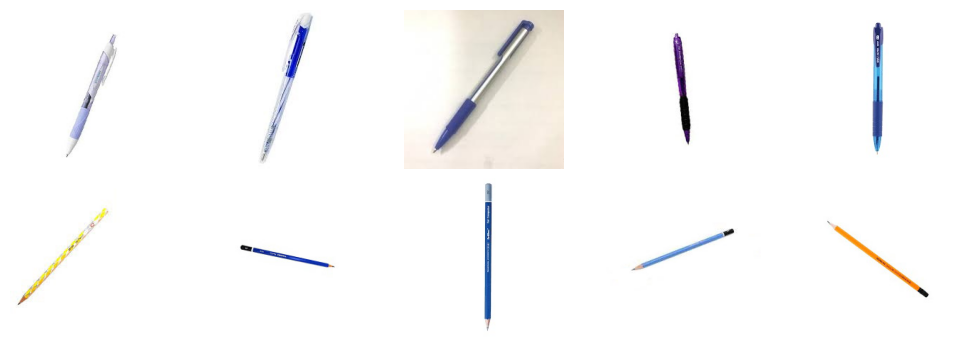

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(train_dir, num_images=2, num_rows=5):
    """Lấy ngẫu nhiên và hiển thị ảnh từ mỗi thư mục con trong Train."""

    class_names = [class_name for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))]
    num_classes = len(class_names)

    if num_classes == 0:
        print("Không có thư mục con (nhãn) nào trong thư mục Train.")
        return

    # Kiểm tra số lượng lớp có đủ để tạo số hàng yêu cầu hay không
    if num_classes < num_rows:
        num_rows = num_classes
        print(f"Chỉ có {num_classes} lớp, hiển thị {num_rows} hàng.")

    fig, axes = plt.subplots(num_rows, num_images, figsize=(10, 2*num_rows)) #Thay đổi ở đây

    # Nếu chỉ có 1 hàng, axes không phải là mảng 2 chiều
    if num_rows == 1:
        axes = np.array([axes])
    elif num_images == 1:
        axes = axes.reshape(-1,1)

    for i in range(num_rows):
        class_name = class_names[i]
        class_path = os.path.join(train_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if len(image_files) < num_images:
            print(f"Lớp '{class_name}' chỉ có {len(image_files)} ảnh, không đủ {num_images} ảnh.")
            continue

        random_images = random.sample(image_files, num_images)

        for j, image_file in enumerate(random_images):
            image_path = os.path.join(class_path, image_file)
            img = mpimg.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

    plt.suptitle("", y=0.02, fontsize=12) # Điều chỉnh vị trí suptitle
    plt.tight_layout(rect=[0, 0.05, 1, 0.98]) # Điều chỉnh layout
    plt.show()

# Đường dẫn đến thư mục Train
train_dir = "Train"

# Hiển thị ảnh
display_random_images(train_dir, num_images=5, num_rows=2)

Lỗi: Danh sách các class trong Train và Test không khớp.


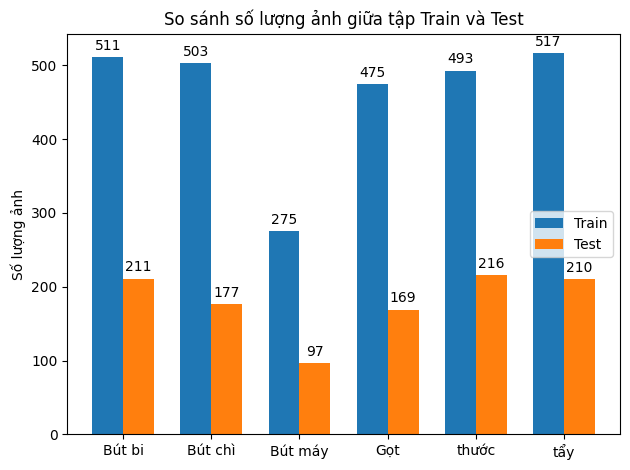

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_data(data_dir):
    """Đếm số lượng dữ liệu trong một thư mục và các thư mục con."""
    counts = {}
    try:
        for class_name in os.listdir(data_dir):
            class_path = os.path.join(data_dir, class_name)
            if os.path.isdir(class_path):
                num_files = len(os.listdir(class_path))
                counts[class_name] = num_files
    except FileNotFoundError:
        print(f"Lỗi: Thư mục '{data_dir}' không tồn tại.")
        return None
    return counts

# Đường dẫn đến thư mục Train và Test
train_dir = "Train"
test_dir = "Test"

# Đếm số lượng dữ liệu
train_counts = count_data(train_dir)
if train_counts is None:
    exit()

test_counts = count_data(test_dir)
if test_counts is None:
    exit()

# Lấy danh sách các lớp (đảm bảo thứ tự giống nhau)
classes = list(train_counts.keys())
if classes != list(test_counts.keys()): #Kiểm tra xem 2 list có giống nhau không
    print("Lỗi: Danh sách các class trong Train và Test không khớp.")
    exit()

# Lấy số lượng dữ liệu cho từng lớp
train_values = list(train_counts.values())
test_values = list(test_counts.values())

# Vẽ biểu đồ cột
x = np.arange(len(classes))  # Vị trí của các cột trên trục x
width = 0.35  # Độ rộng của cột

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

# Thêm nhãn, tiêu đề và chú thích
ax.set_ylabel('Số lượng ảnh')
ax.set_title('So sánh số lượng ảnh giữa tập Train và Test')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()


def autolabel(rects):
    """Gắn nhãn giá trị lên trên mỗi cột."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 điểm offset theo chiều dọc
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

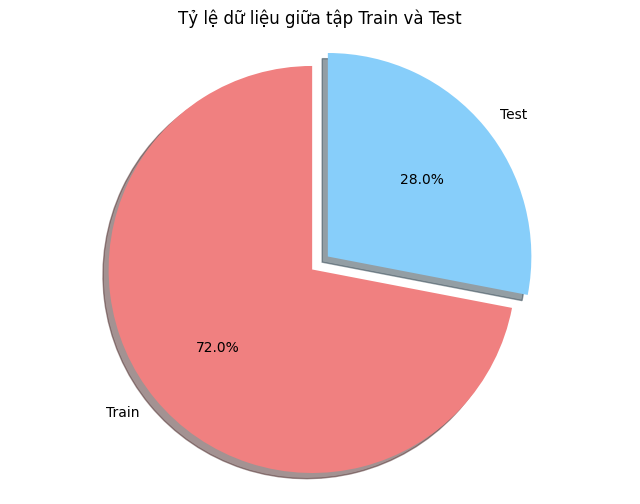

In [1]:
import matplotlib.pyplot as plt
import os

def count_data(data_dir):
    """Đếm số lượng dữ liệu trong một thư mục và các thư mục con."""
    counts = {}
    try:
        for class_name in os.listdir(data_dir):
            class_path = os.path.join(data_dir, class_name)
            if os.path.isdir(class_path):
                num_files = len(os.listdir(class_path))
                counts[class_name] = num_files
    except FileNotFoundError:
        print(f"Lỗi: Thư mục '{data_dir}' không tồn tại.")
        return None
    return counts

# Đường dẫn đến thư mục Train và Test
train_dir = "Train"
test_dir = "Test"

# Đếm số lượng dữ liệu
train_counts = count_data(train_dir)
if train_counts is None:
    exit()

test_counts = count_data(test_dir)
if test_counts is None:
    exit()

# Tính tổng số lượng dữ liệu
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())

# Dữ liệu cho biểu đồ tròn
labels = ['Train', 'Test']
sizes = [total_train, total_test]
colors = ['lightcoral', 'lightskyblue']  # Màu sắc cho từng phần
explode = (0.1, 0)  # "Nổ" phần Train ra một chút

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6)) #Điều chỉnh kích thước biểu đồ
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Đảm bảo hình tròn không bị méo
plt.axis('equal')

# Thêm tiêu đề
plt.title('Tỷ lệ dữ liệu giữa tập Train và Test')

# Hiển thị biểu đồ
plt.show()

Lỗi: Danh sách các class trong Train và Test không khớp.


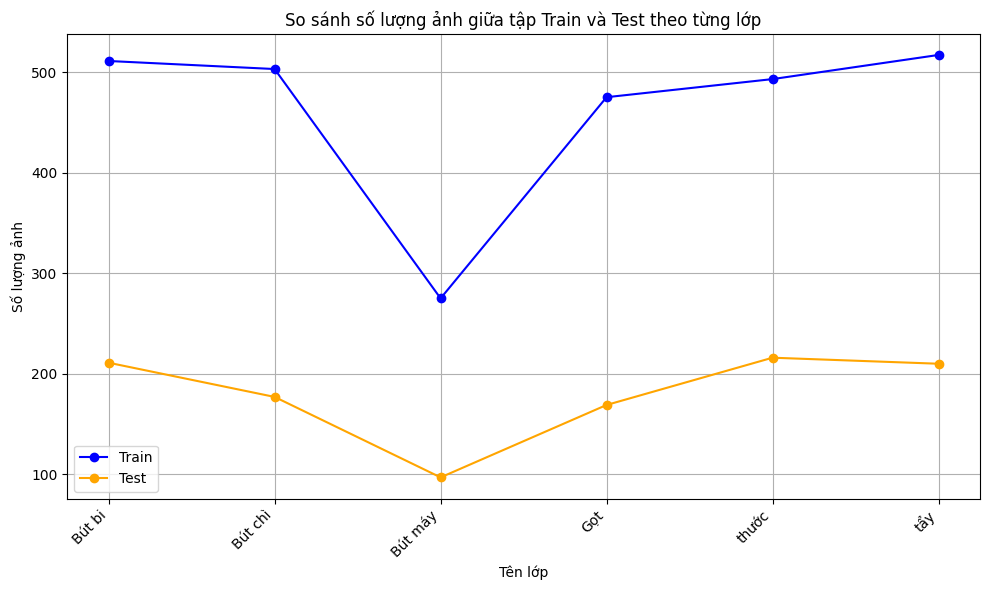

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_data(data_dir):
    """Đếm số lượng dữ liệu trong một thư mục và các thư mục con."""
    counts = {}
    try:
        for class_name in os.listdir(data_dir):
            class_path = os.path.join(data_dir, class_name)
            if os.path.isdir(class_path):
                num_files = len(os.listdir(class_path))
                counts[class_name] = num_files
    except FileNotFoundError:
        print(f"Lỗi: Thư mục '{data_dir}' không tồn tại.")
        return None
    return counts

# Đường dẫn đến thư mục Train và Test
train_dir = "Train"
test_dir = "Test"

# Đếm số lượng dữ liệu
train_counts = count_data(train_dir)
if train_counts is None:
    exit()

test_counts = count_data(test_dir)
if test_counts is None:
    exit()

# Lấy danh sách các lớp (đảm bảo thứ tự giống nhau)
classes = list(train_counts.keys())
if classes != list(test_counts.keys()):
    print("Lỗi: Danh sách các class trong Train và Test không khớp.")
    exit()

# Lấy số lượng dữ liệu cho từng lớp
train_values = list(train_counts.values())
test_values = list(test_counts.values())

# Vẽ biểu đồ đường
x = np.arange(len(classes))  # Vị trí của các điểm trên trục x

plt.figure(figsize=(10, 6))

plt.plot(x, train_values, marker='o', label='Train', linestyle='-', color='blue')
# Thay đổi màu đường Test thành màu vành chanh
plt.plot(x, test_values, marker='o', label='Test', linestyle='-', color='orange') # hoặc '#FFA500'

# Thêm nhãn, tiêu đề và chú thích
plt.xlabel('Tên lớp')
plt.ylabel('Số lượng ảnh')
plt.title('So sánh số lượng ảnh giữa tập Train và Test theo từng lớp')
plt.xticks(x, classes, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()